<a href="https://colab.research.google.com/github/jianfeiZhao/Machine-Learning-basic/blob/master/Neural_Net_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

mnist = datasets.MNIST('./data', download=True)

threes = mnist.data[(mnist.targets == 3)]/255.0
sevens = mnist.data[(mnist.targets == 7)]/255.0
len(threes), len(sevens)

(6131, 6265)

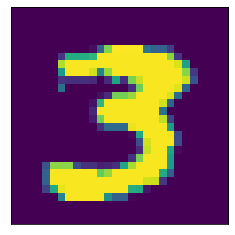

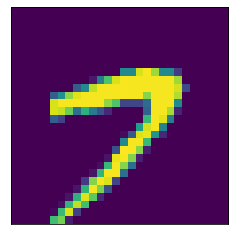

In [70]:
def show_image(img):
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()
  
show_image(threes[3])
show_image(sevens[8])

In [71]:
print(threes.shape, sevens.shape)
# Combine them into a single data set to feed into our neural network.
combined_data = torch.cat([threes, sevens])
combined_data.shape

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


torch.Size([12396, 28, 28])

In [72]:
# flatten the images in the dataset -> input for the NN
flat_imgs = combined_data.view((-1, 28*28))

flat_imgs.shape

torch.Size([12396, 784])

In [73]:
# create labels corresponding to the images in the combined dataset
target = torch.tensor([1]*len(threes)+[2]*len(sevens))
target.shape

torch.Size([12396])

To train your neural network (2 layers), follow these steps.

In [74]:
# Step 1: Building the model
def sigmoid(x): return 1/(1+torch.exp(-x))

def simple_nn(data, weights, bias): return sigmoid((data@weights) + bias)

# Step 2: Defining the loss
def error(pred, target): return ((pred-target)**2).mean()

# Step 3: Initialize the weight values 
w1 = torch.randn((flat_imgs.shape[1], flat_imgs.shape[1]), requires_grad=True)
w2 = torch.randn((flat_imgs.shape[1], 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)
plot = []

# Step 4: Update the weights
for i in range(100):
  pred1 = simple_nn(flat_imgs, w1, b)
  pred = simple_nn(pred1, w2, b)
  loss = error(pred, target.unsqueeze(1))
  loss.backward()

  w1.data -= 0.05*w1.grad.data
  w2.data -= 0.05*w2.grad.data
  b.data -= 0.05*b.grad.data
 
  w1.grad.zero_()
  w2.grad.zero_()
  b.grad.zero_()
  
  if i%10 == 0:
    plot.append(loss.item())
    print("Loss: ", loss.item())

Loss:  2.2761099338531494
Loss:  1.9605647325515747
Loss:  1.273838996887207
Loss:  0.8304148316383362
Loss:  0.6736728549003601
Loss:  0.6051331758499146
Loss:  0.5698687434196472
Loss:  0.5499998927116394
Loss:  0.5381757616996765
Loss:  0.531075119972229


In [75]:
# one layer
w = torch.randn((flat_imgs.shape[1], 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)
plot1 = []

for i in range(2000):
  pred = simple_nn(flat_imgs, w, b)
  loss = error(pred, target.unsqueeze(1))
  loss.backward()

  w.data -= 0.01*w.grad.data
  b.data -= 0.01*b.grad.data
 
  w.grad.zero_()
  b.grad.zero_()
  
  if i%200 == 0:
    plot1.append(loss.item())
    print("Loss: ", loss.item())

Loss:  2.4538018703460693
Loss:  2.429169178009033
Loss:  2.379192590713501
Loss:  2.26164174079895
Loss:  1.8552180528640747
Loss:  0.7870759963989258
Loss:  0.5978202223777771
Loss:  0.5564789772033691
Loss:  0.5387692451477051
Loss:  0.5292753577232361


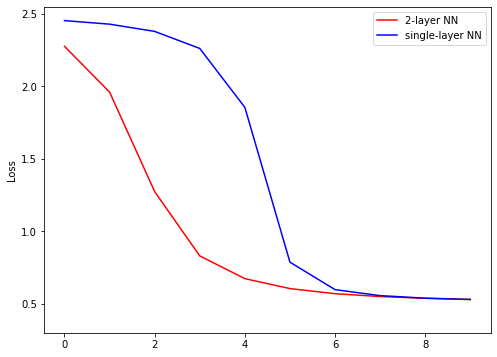

In [76]:
plt.figure(figsize=(8,6))
plt.plot(plot, 'r')
plt.plot(plot1, 'b')
plt.legend(['2-layer NN', 'single-layer NN'])
plt.ylim(bottom=0.3)
plt.ylabel('Loss')
plt.show()